In [25]:
# APMAE4990 Inrto_Data_Science Homework 3
# Name: Ho Hin Lee
# Uni: hl3003

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from pandas import Series, DataFrame

df = pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv')
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [26]:
df['default'] = df['default'].replace("No",0).replace("Yes",1)
df['student'] = df['student'].replace("No",0).replace("Yes",1)
df.head()

,Unnamed: 0,default,student,balance,income
0,1,0,0,729.526495,44361.625074
1,2,0,1,817.180407,12106.134700
2,3,0,0,1073.549164,31767.138947
3,4,0,0,529.250605,35704.493935
4,5,0,0,785.655883,38463.495879


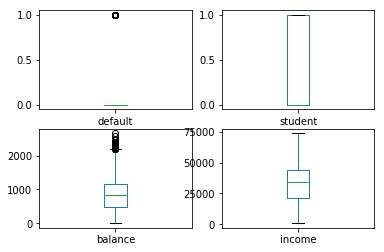

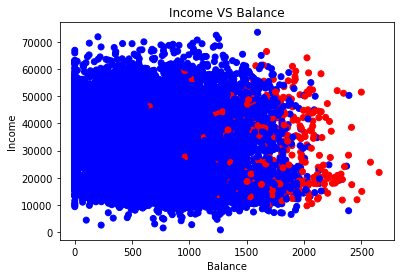

In [27]:
plt.subplot(2, 2, 1)
df['default'].plot.box()
plt.subplot(2, 2, 2)
df['student'].plot.box()
plt.subplot(2, 2, 3)
df['balance'].plot.box()
plt.subplot(2, 2, 4)
df['income'].plot.box()
plt.show()
plt.figure()
colors= {0:"blue",1:"red"}
plt.scatter(df["balance"],df["income"],c = df["default"].apply(lambda x:colors[x]))
plt.xlabel("Balance")
plt.ylabel("Income")
plt.title('Income VS Balance')
plt.show()

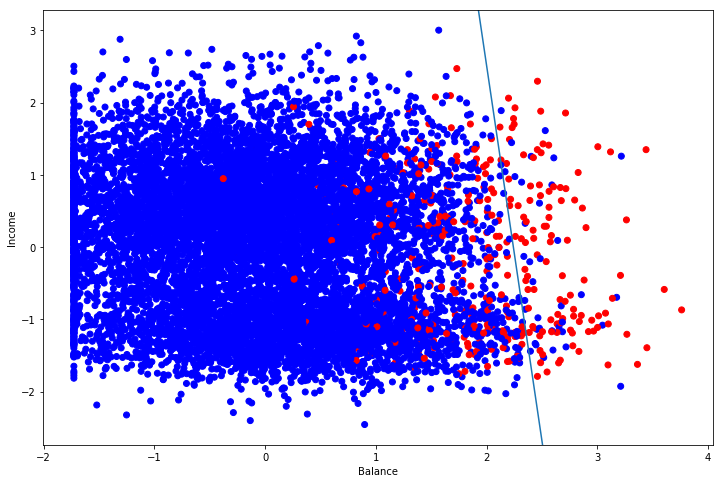

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[["balance","income"]]
y = df["default"]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logist = LogisticRegression(penalty='l1')
model=logist.fit(X_train, y_train)

colors = {0:'blue',1:'red'}
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:,0],X[:,1],c = df['default'].apply(lambda x:colors[x]))
plt.xlabel("Balance")
plt.ylabel("Income")

bound = model.intercept_
coef = model.coef_[0]
x_min,x_max = ax.get_xlim()
y_min,y_max = ax.get_ylim()
x = np.arange(x_min,x_max)
y = (bound+coef[0]*x)/-coef[1]

plt.plot(x,y)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()

Area under the ROC curve : 0.942674


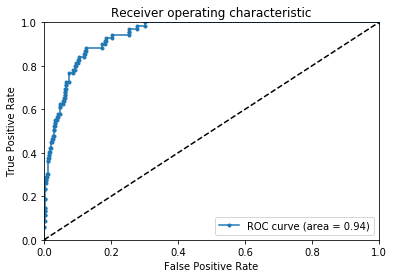

In [29]:
from sklearn.metrics import auc, roc_curve
from sklearn.datasets import make_classification

def generate_auc(X,y,clf_class,**kwargs):
    random_state = np.random.RandomState(0)
    
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds


fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=0.1,penalty='l1')
def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
generate_ROCplot(fpr,tpr,'LR',roc_auc)

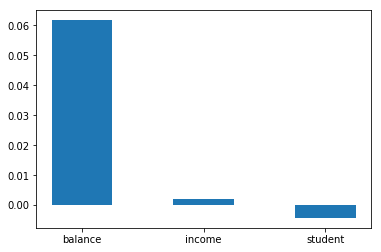

The coefficients for balance, income and student are shown respectively: [ 0.06172524  0.00212686 -0.00427   ].
Area under the ROC curve : 0.957912


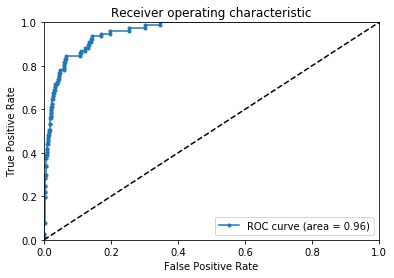

The performance just improved very slightly when variables are added into the model.


In [30]:
from sklearn.linear_model import Ridge
X = df[['balance','income','student']]
y = df['default']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 50)

alphas = np.logspace(-9, -1, 100)
score = []
for alpha in alphas:
    clf = Ridge(alpha=alpha)
    clf.fit(X_train, y_train)
    score.append(clf.score(X_test, y_test))
opt_index = np.array(score).argmax()

clf = Ridge(alpha=alphas[opt_index])
clf.fit(X_train, y_train)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.bar(np.arange(3), clf.coef_, 0.5)
ax.set_xticks(np.arange(3))
ax.set_xticklabels(('balance', 'income', 'student'))
rects = ax.patches
plt.show()
print ('The coefficients for balance, income and student are shown respectively: {0}.'.format(clf.coef_))

def generate_auc(X,y,clf_class,**kwargs):
    random_state = np.random.RandomState(0)
    
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds


fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=0.1,penalty='l1')
def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
generate_ROCplot(fpr,tpr,'LR',roc_auc)
print("The performance just improved very slightly when variables are added into the model.")

In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logist, X_train, y_train, cv=8)
print(scores)
print("The cross validation score is high with the score over 0.95 and it shows that the model is robust.")

[ 0.98   0.974  0.968  0.977  0.977  0.972  0.973  0.973]
The cross validation score is high with the score over 0.95 and it shows that the model is robust.


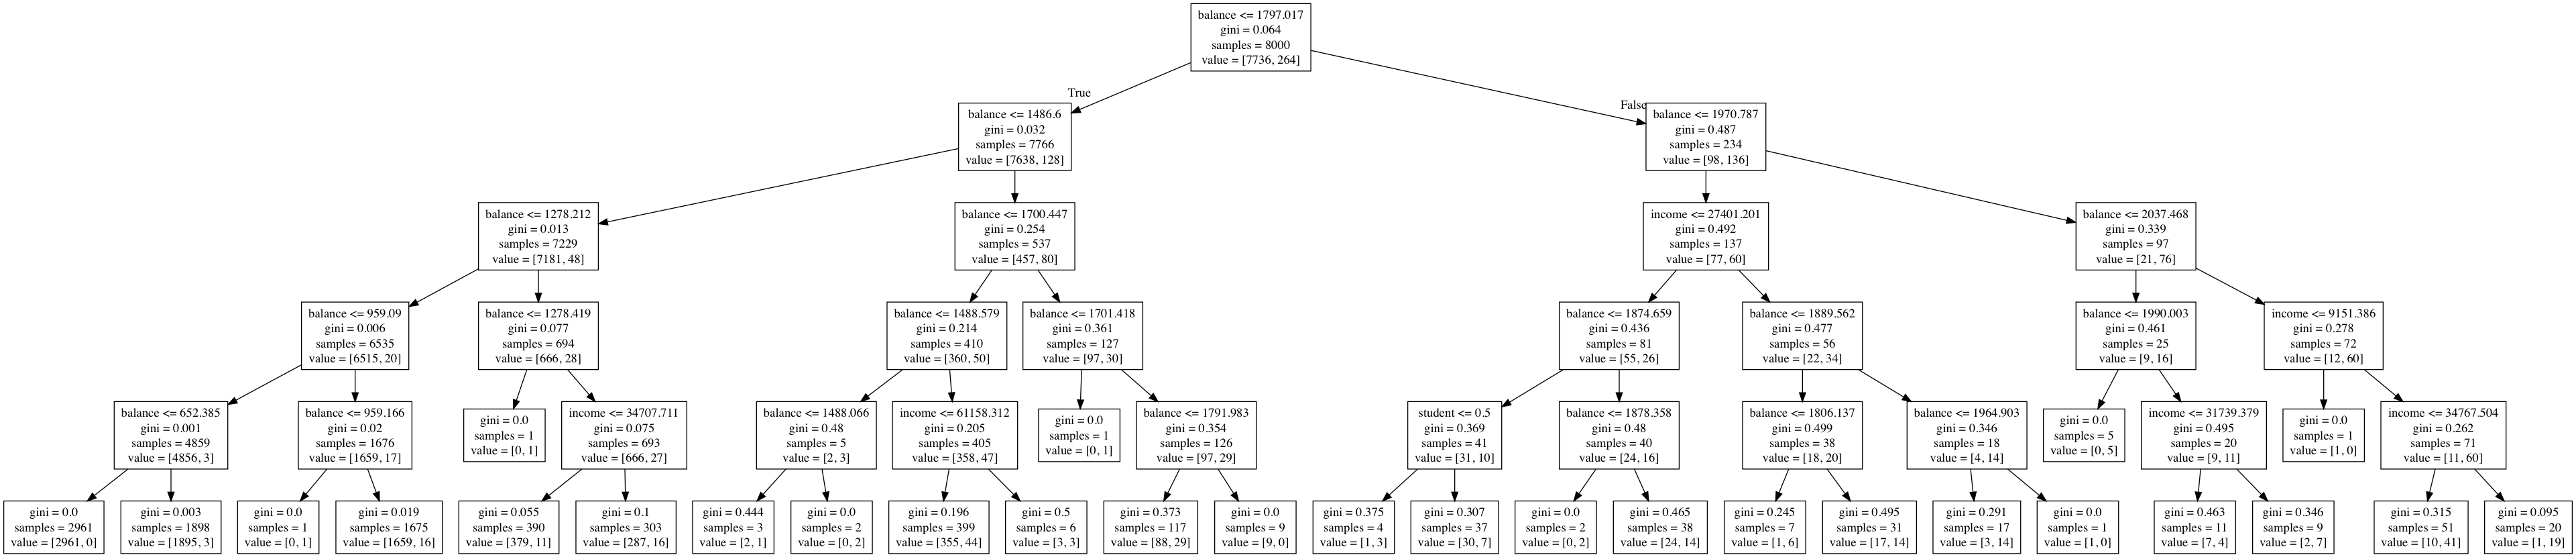

In [32]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus

X = df[['student','balance','income']]
y = df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

clf=DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

dot_data = StringIO()  
export_graphviz(clf, out_file=dot_data, feature_names=X_train.columns)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Optimal Depth: 5.


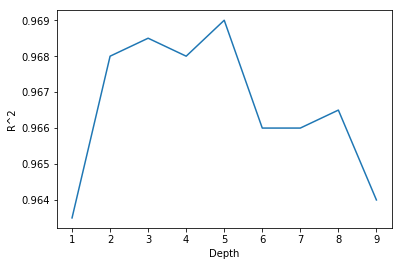

In [33]:
errors_train=[]
errors_test=[]
depths = range(1,10)
for n in depths:
    Tree = DecisionTreeClassifier(max_depth=n)
    # Train the model using the training sets
    Tree.fit(X_train, y_train)
    errors_train.append(Tree.score(X_train,y_train))
    errors_test.append(Tree.score(X_test,y_test))
plt.ylabel('R^2')
plt.xlabel('Depth')
plt.plot(depths,errors_test)
n_opt = depths[np.argmax(errors_test)]
print("Optimal Depth: {0}.".format(n_opt))
plt.show()

Area under the ROC curve : 0.687625


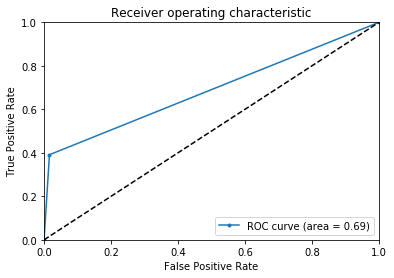

Max Depth = 1
Area under the ROC curve : 0.828181


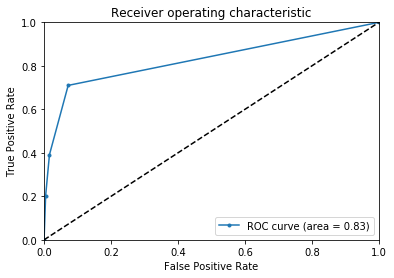

Max Depth = 2
Area under the ROC curve : 0.896562


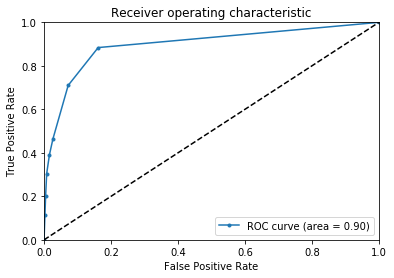

Max Depth = 3
Area under the ROC curve : 0.932550


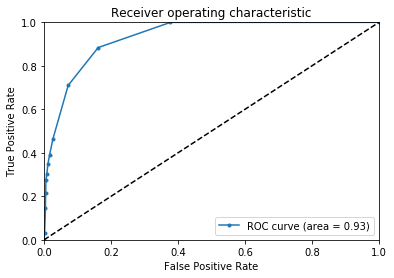

Max Depth = 4
Area under the ROC curve : 0.921757


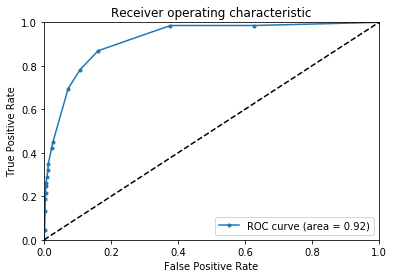

Max Depth = 5
Area under the ROC curve : 0.904683


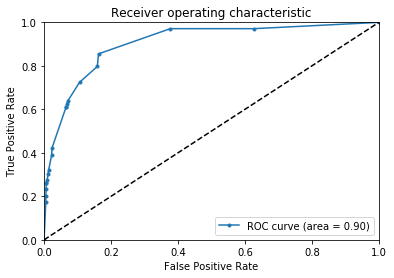

Max Depth = 6
Area under the ROC curve : 0.822612


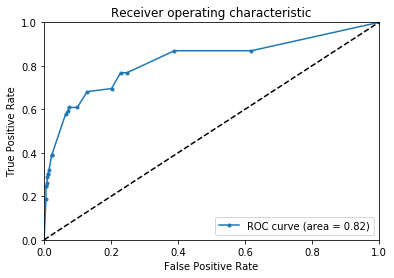

Max Depth = 7
Area under the ROC curve : 0.836092


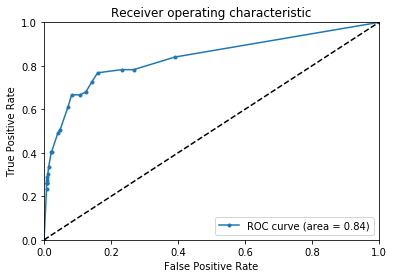

Max Depth = 8
It shows that the model has the highest auc value when the maximum depth is 3 and the model has a high accuracy when the maximum depth is between 3 and 4.


In [34]:
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,DecisionTreeClassifier,max_depth = 1)
generate_ROCplot(fpr,tpr,'LR',roc_auc)
print('Max Depth = 1')
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,DecisionTreeClassifier,max_depth = 2)
generate_ROCplot(fpr,tpr,'LR',roc_auc)
print('Max Depth = 2')

fpr,tpr,roc_auc, thresholds = generate_auc(X,y,DecisionTreeClassifier,max_depth = 3)
generate_ROCplot(fpr,tpr,'LR',roc_auc)
print('Max Depth = 3')

fpr,tpr,roc_auc, thresholds = generate_auc(X,y,DecisionTreeClassifier,max_depth = 4)
generate_ROCplot(fpr,tpr,'LR',roc_auc)
print('Max Depth = 4')

fpr,tpr,roc_auc, thresholds = generate_auc(X,y,DecisionTreeClassifier,max_depth = 5)
generate_ROCplot(fpr,tpr,'LR',roc_auc)
print('Max Depth = 5')

fpr,tpr,roc_auc, thresholds = generate_auc(X,y,DecisionTreeClassifier,max_depth = 6)
generate_ROCplot(fpr,tpr,'LR',roc_auc)
print('Max Depth = 6')

fpr,tpr,roc_auc, thresholds = generate_auc(X,y,DecisionTreeClassifier,max_depth = 7)
generate_ROCplot(fpr,tpr,'LR',roc_auc)
print('Max Depth = 7')

fpr,tpr,roc_auc, thresholds = generate_auc(X,y,DecisionTreeClassifier,max_depth = 8)
generate_ROCplot(fpr,tpr,'LR',roc_auc)
print('Max Depth = 8')

print('It shows that the model has the highest auc value when the maximum depth is 3 and the model has a high accuracy when the maximum depth is between 3 and 4.')